In [1]:
from sklearn.datasets import load_boston
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.data[0:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [7]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
df.columns[0]

'CRIM'

# Visualization

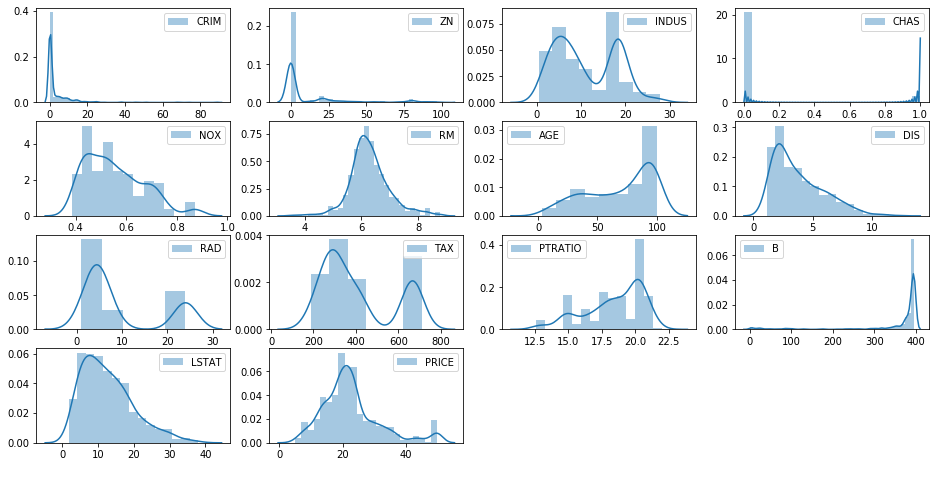

In [12]:
fig = plt.figure(figsize=(16,8))
for col in range(14):
    fig.add_subplot(4,4,col+1)
    sns.distplot(df.iloc[:,col], label=str(df.columns[col]))
    plt.xlabel(' ')
    plt.legend()


In [13]:
corr_ = df.corr(method='pearson')

In [14]:
np.shape(corr_)

(14, 14)

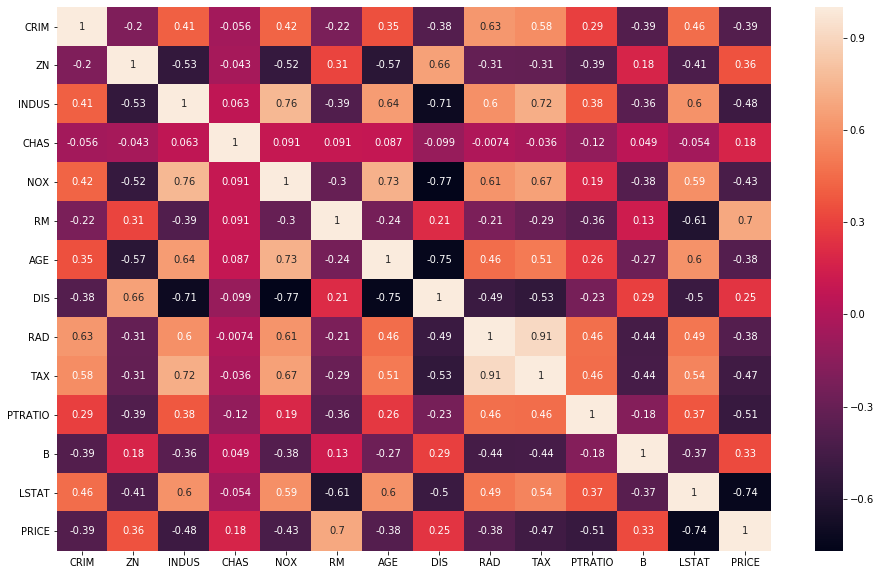

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True)

In [16]:
corr_['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [17]:
l1 = corr_['PRICE'].values.tolist()
l1.remove(l1[-1])
l1[0:3]

[-0.3883046085868114, 0.3604453424505447, -0.483725160028373]

In [18]:
l = l1
ls = np.sort(l).tolist()
ls1 = ls[-1::-1]
ls1[0:3]

[0.6953599470715389, 0.3604453424505447, 0.33346081965706653]

In [19]:
idx = np.argsort(l).tolist()
idx

[12, 10, 2, 9, 4, 0, 8, 6, 3, 7, 11, 1, 5]

In [20]:
label = corr_['PRICE'].index.tolist()
label[0:2]

['CRIM', 'ZN']

In [21]:
type(label)

list

In [22]:
label1 = []

In [23]:
for itm in idx:
    label1.append(label[itm])

In [24]:
label1[-1::-1]

['RM',
 'ZN',
 'B',
 'DIS',
 'CHAS',
 'AGE',
 'RAD',
 'CRIM',
 'NOX',
 'TAX',
 'INDUS',
 'PTRATIO',
 'LSTAT']

In [25]:
label1s = label1[-1::-1]
label1s[0:2]

['RM', 'ZN']

In [26]:
df_corr = pd.DataFrame({'itm':label1s, 'corr':ls1})
df_corr

,itm,corr
0,RM,0.695360
1,ZN,0.360445
2,B,0.333461
3,DIS,0.249929
4,CHAS,0.175260
5,AGE,-0.376955
6,RAD,-0.381626
7,CRIM,-0.388305
8,NOX,-0.427321
9,TAX,-0.468536


In [27]:
df_corr_1 = df_corr.set_index(df_corr['itm'])
df_corr_1.head()

,itm,corr
itm,,
RM,RM,0.695360
ZN,ZN,0.360445
B,B,0.333461
DIS,DIS,0.249929
CHAS,CHAS,0.175260


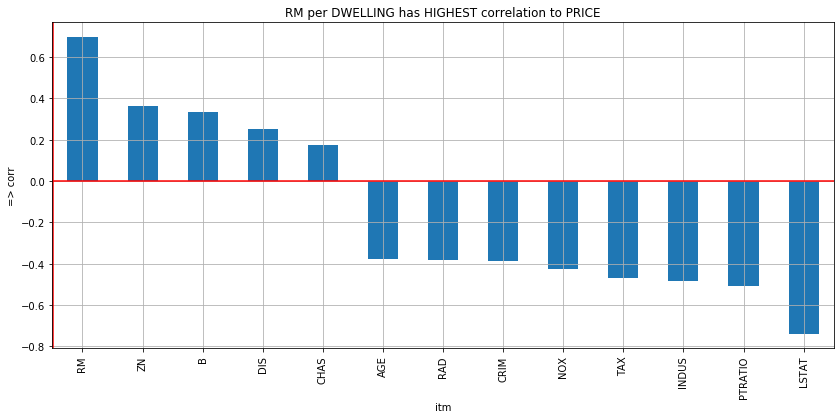

In [28]:
df_corr_1['corr'].plot(kind='bar', figsize=(14,6))
plt.axvline(-0.49, color='red', linestyle='-')
plt.axhline(0, color='red', linestyle='-')
plt.title('RM per DWELLING has HIGHEST correlation to PRICE')
plt.ylabel('=> corr')
plt.grid()
plt.show()

In [29]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Regression

### RM vs PRICE

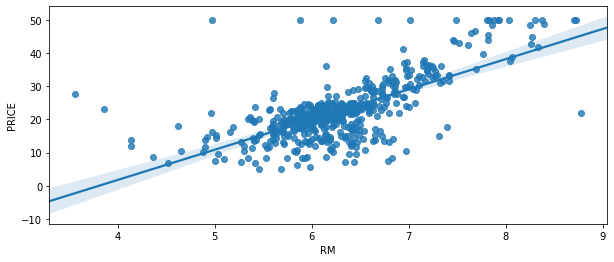

In [30]:
plt.figure(figsize=(10,4))
sns.regplot(x="RM", y="PRICE", data=df)

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
ols_pr_rm = ols('PRICE ~ RM', df).fit()
ols_pr_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           2.49e-74
Time:                        00:42:17   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

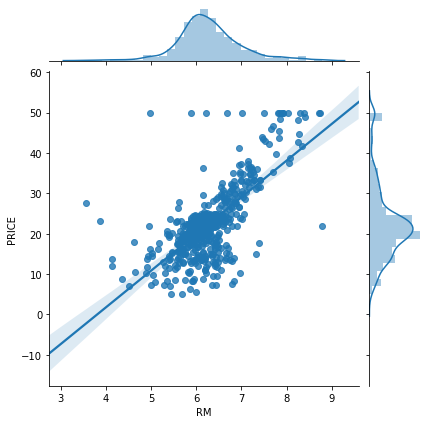

In [33]:

sns.jointplot(x="RM", y="PRICE", data=df, kind="reg")

In [34]:
66.6/7.3

9.123287671232877

### LSTAT vs PRICE

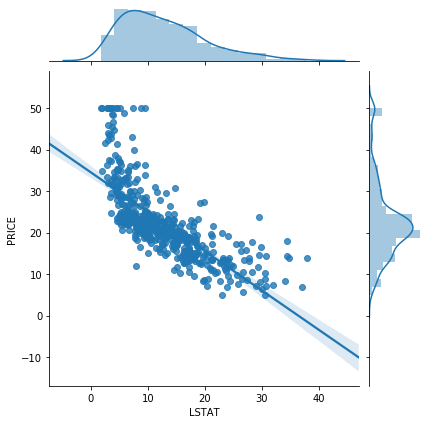

In [35]:
sns.jointplot(x='LSTAT', y='PRICE', data=df, kind='reg')

In [36]:
ols_pr_lstat = ols("PRICE ~ LSTAT", data=df).fit()  # ols -> ordinary least square
ols_pr_lstat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           5.08e-88
Time:                        00:42:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
ols_pr_rm.params[1]

9.102108981180306

In [38]:
g = df_corr_1.index.tolist()
g

['RM',
 'ZN',
 'B',
 'DIS',
 'CHAS',
 'AGE',
 'RAD',
 'CRIM',
 'NOX',
 'TAX',
 'INDUS',
 'PTRATIO',
 'LSTAT']

In [49]:
for itm in g:  
    str1 = str(" PRICE ~ ") + str(itm)
    str2 = str(str1)
    ols_fit = ols(str2, data=df).fit()
    print(ols_fit.params[1])

9.102108981180306
0.1421399941553545
0.03359306011501362
1.0916130158411057
6.3461571125265515
-0.12316272123567987
-0.40309539555252993
-0.41519027791509056
-33.9160550086611
-0.025568099481987235
-0.6484900536157133
-2.157175296060963
-0.9500493537579908


In [50]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report, accuracy_score

In [52]:
x_tr, x_t, y_tr, y_t = train_test_split(df[["RM"]].values, df[["PRICE"]].values, test_size=0.15, random_state=100)
np.shape(x_tr), np.shape(y_tr), np.shape(x_t), np.shape(y_t)

((430, 1), (430, 1), (76, 1), (76, 1))

In [53]:
lr = LinearRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)

In [54]:
y_p[0:5].tolist(), y_t[0:5].tolist()

([[31.48770152144715],
  [25.052497893143745],
  [21.202071345460823],
  [20.774246173496053],
  [17.50316621284876]],
 [[34.6], [31.5], [20.6], [14.5], [16.2]])

In [55]:
r2_score(y_t, y_p), mean_squared_error(y_t, y_p)

(0.6254819615240168, 26.940868860063624)

In [56]:
X=df[ ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'] ].values
np.shape(X)

(506, 13)

In [57]:
y = df[['PRICE']].values
np.shape(y)

(506, 1)

In [58]:
x_tr, x_t, y_tr, y_t = train_test_split(X, y, test_size=0.15, random_state=100)
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
r2_score(y_t, y_p), mean_squared_error(y_t, y_p)

(0.8273125828534873, 12.422229588884392)